# 1/. Import Data

## Import Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("BankChurners.csv")

In [3]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


## Overview Data

In [4]:
df.shape # 10127 rows, 23 columns

(10127, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

# 2/. Clean Data

## 2.1/. Remove Unwanted Data

In [6]:
# Get the name of all columns
df.columns

# Need drop:
# CLIENTNUM,  2 columns Naive Bayes

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [7]:
# Get the length of list, and then minus to 1 and 2 to get the position of 2 Bayes columns
print(f'Length of the list: {len(df.columns)}')
print(f'Name of the first unneccessary column: {df.columns[len(df.columns) - 1]}')
print(f'Name of the second unneccessary column: {df.columns[len(df.columns) - 2]}')

Length of the list: 23
Name of the first unneccessary column: Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
Name of the second unneccessary column: Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1


In [8]:
# Drop 3 columns: (CLIENTNUM,  2 columns Naive Bayes)

df = df.drop(columns = ['CLIENTNUM', df.columns[len(df.columns) - 1], df.columns[len(df.columns) - 2]])

In [9]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## 2.2/. NA Data

In [10]:
df.isna().sum()

df.isna().sum() / df.shape[0] # Marital_Status, Income_Category => NA < 10% => FillNA

Attrition_Flag              0.000000
Customer_Age                0.000000
Gender                      0.000000
Dependent_count             0.000000
Education_Level             0.000000
Marital_Status              0.073961
Income_Category             0.109805
Card_Category               0.000000
Months_on_book              0.000000
Total_Relationship_Count    0.000000
Months_Inactive_12_mon      0.000000
Contacts_Count_12_mon       0.000000
Credit_Limit                0.000000
Total_Revolving_Bal         0.000000
Avg_Open_To_Buy             0.000000
Total_Amt_Chng_Q4_Q1        0.000000
Total_Trans_Amt             0.000000
Total_Trans_Ct              0.000000
Total_Ct_Chng_Q4_Q1         0.000000
Avg_Utilization_Ratio       0.000000
dtype: float64

In [11]:
df = df.fillna('Unknown')

In [12]:
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [13]:
# Filter Unknown (Out of df)

df = df[df['Education_Level'] != 'Unknown']
df = df[df['Income_Category'] != 'Unknown']

In [14]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## 2.3/. Duplicated

In [15]:
df.duplicated().sum()

np.int64(0)

## 2.4/. Check Data Columns

### 2.4.1/. Numeric Data

In [16]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,7641.000000,7641.000000,7641.000000,7641.000000,7641.000000,7641.000000,7641.000000,7641.000000,7641.000000,7641.000000,7641.000000,7641.000000,7641.000000,7641.000000
mean,46.303756,2.351525,35.950530,3.814553,2.343411,2.450988,8559.183209,1166.122628,7393.060581,0.759349,4415.400864,64.667190,0.711507,0.280656
std,7.958827,1.290410,7.941765,1.550470,0.999927,1.103059,9162.211045,813.282318,9171.863364,0.221131,3457.148069,23.745462,0.237953,0.278156
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2507.000000,451.000000,1255.000000,0.630000,2109.000000,44.000000,0.583000,0.025000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4343.000000,1280.000000,3292.000000,0.735000,3866.000000,67.000000,0.700000,0.184000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,10877.000000,1781.000000,9663.000000,0.858000,4751.000000,81.000000,0.818000,0.513000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,17995.000000,134.000000,3.714000,0.999000


(20.0, 80.0)

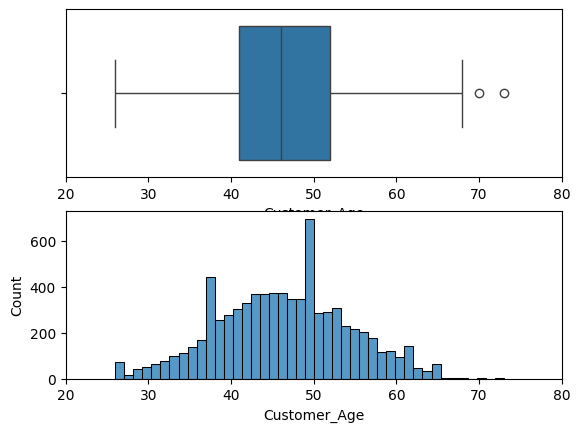

In [17]:
# Check Age

plt.subplot(211)
sns.boxplot(data=df, x='Customer_Age')
plt.xlim(20,80)

plt.subplot(212)
sns.histplot(data=df, x='Customer_Age')
plt.xlim(20,80)

What we can get from Customer_Age:

_ Youngest customers: 26
_ 25% of customers < 41
_ 50% of customers < 46
_ 75% of customers < 52
_ Oldest customers: 73

In [18]:
# 1. Calculate the quantiles
q1 = df['Customer_Age'].quantile(0.25) 
q3 = df['Customer_Age'].quantile(0.75) 

# 2. Calculate the interquantile range
iqr = q3 - q1
iqr

# # 3. Calculate the whisker
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

df[df['Customer_Age'] > upper]['Customer_Age']

# 2 outliers of variable Customer_Age: 70 and 73 years old.

251    73
254    70
Name: Customer_Age, dtype: int64

### 2.4.2/. Categorical Data

In [19]:
# Check Category Columns

cat_name = []

for col in df.columns:
  if df[col].dtype == "object":
    cat_name.append(col)

print(cat_name)

['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [20]:
df[cat_name].head()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue


These columns can be converted into level score (Low -> High):

Education_Level
Income_Category

In [21]:
# Create a dictionary to score each kind of label (Education)
edu_level_dict = {'Uneducated': 0,
                  'High School': 1,
                  'College': 2,
                  'Post-Graduate': 3,
                  'Graduate': 4,
                  'Doctorate': 5}

# Then, use map function to map the Education_Level column to the above dictionary

df['edu_level'] = df['Education_Level'].map(edu_level_dict)

In [22]:
# Income Level (# Education)

income_level_dict = {'Less than $40K': 0,
                     '$40K - $60K': 1,
                     '$60K - $80K': 2,
                     '$80K - $120K': 3,
                     '$120K +': 4}

df['income_level'] = df['Income_Category'].map(income_level_dict)

In [23]:
df[['edu_level', 'income_level']].head()

,edu_level,income_level
0,1,2
1,4,0
2,4,3
3,1,0
4,0,2


## 2.5/. Key Metrics Example

Assume you're the owner of a sporting goods store

Average Utilization Ratio (AUR):

_ Example: A customer has a credit limit of $10,000 but only spends an average of $3,000 per month. 
=> This customer's AUR is 30%.
=> This customer has unused credit and the potential to spend more. 
=> You could offer promotions or introduce new products to encourage increased spending.

Churn:

_ Example: In the past month, 50/100 customers stopped using their credit cards at your store.
=> Churn = 50%
=> There could be several reasons for this
=> You need to investigate the specific reasons to find solutions.

Credit card usage behavior:

_ Example: You notice that customers often use their cards to buy shoes on weekends and frequently shop online.
=> You could focus on advertising new shoe products on weekends or implement special promotions for online shoppers.

Number of products:

_ Example: A customer uses their credit card not only to buy sporting goods but also to pay for utilities.
=> This customer has a strong relationship with your store. 
=> You could cross-sell additional products or services like sports insurance or gym memberships to increase revenue.

Payment amount:

_ Example: A customer has spent a total of $50,000 on their credit card in the past year.
=> This customer is a loyal customer and brings in high revenue. 
=> You could include this customer in a loyalty program to offer special rewards.

# 3/. EDA

## 3.1/. Left vs Stayed Customer

<Axes: xlabel='Attrition_Flag', ylabel='count'>

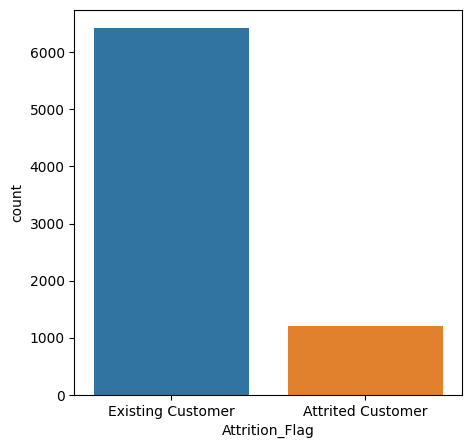

In [24]:
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='Attrition_Flag',hue='Attrition_Flag')

In [25]:
df['Attrition_Flag'].value_counts() / df.shape[0]

# Churn customers account for 16% of total customers
# => Is there any patterns/trends of this type of customer?

Attrition_Flag
Existing Customer    0.841513
Attrited Customer    0.158487
Name: count, dtype: float64

## 3.2/. Age

<Axes: xlabel='Attrition_Flag', ylabel='Customer_Age'>

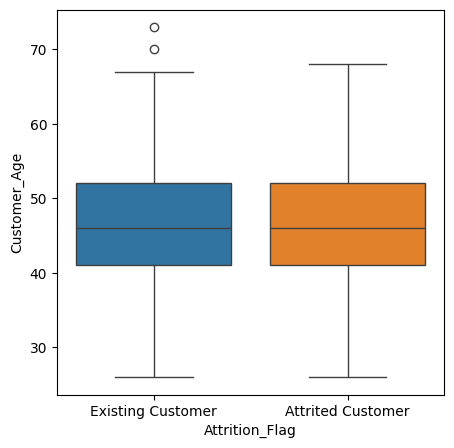

In [26]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df, x='Attrition_Flag', y='Customer_Age', hue='Attrition_Flag')

# Not big difference between these 2 groups when it come to customer ages

## 3.3/. Gender

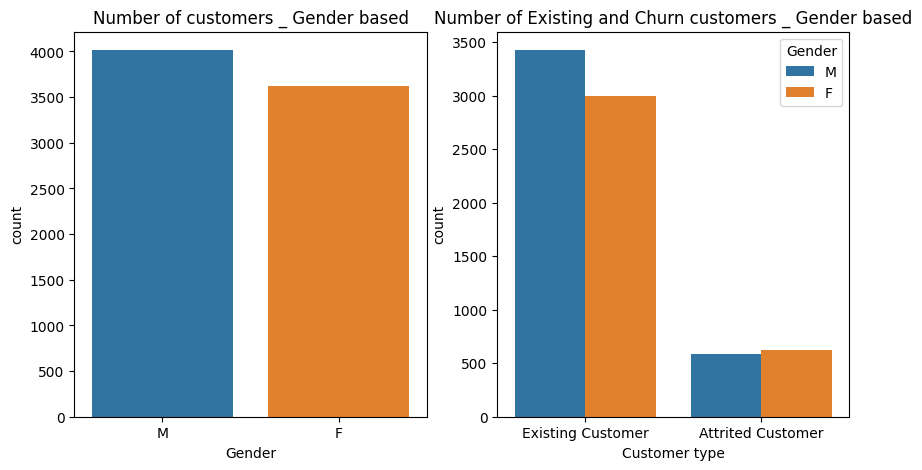

In [27]:
# Distribution of customers by Gender
# Distribution of Churn Customers by Gender

plt.figure(figsize=(10,5))

plt.subplot(121)
sns.countplot(data=df, x='Gender', hue="Gender")
plt.title('Number of customers _ Gender based')

plt.subplot(122)
sns.countplot(data=df, x='Attrition_Flag', hue='Gender')   # Attrition_Flag: Churn Customers
plt.xlabel('Customer type')
plt.title('Number of Existing and Churn customers _ Gender based')

plt.show()

## Insight

_ Number of Female customers are lower than Male (left chart) 
while more Female customers left Bank than Male


# 4/. Deep Analysis

Insight: We should bring Female Customers back

Question: Why FEMALE customers has higher Churn Rate than male customers?
=> Need to focus on Female credit card usage behavior.
=> Focus on Average Utilization Ratio (AUR) 
+. Which is calculated based on the customer's debt and credit limit.

High AUR: 
_ Indicates that a customer is nearly maxing out their credit limit. 
=> This can lead to difficulties in making payments, higher interest charges,.... 
=> Ultimately, decise to cancel the card.

_ Comparing AUR between genders, if women have a higher AUR 
=> Partially explain why they are canceling their cards at a higher rate.

Key Metric: Average Utilization Ratio (AUR) 
Target Audience: Relevant Manager

## 4.1/. Churn Customer Situation

C:\Users\Admin\AppData\Local\Temp\ipykernel_13536\2219431118.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette=color_r)


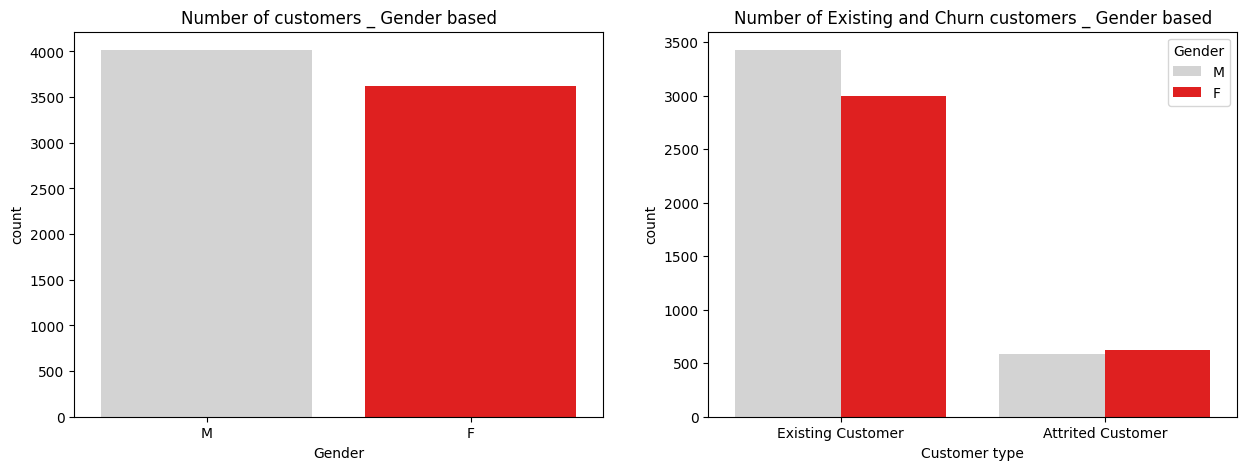

In [28]:
color_r = ['lightgray', 'red']

plt.figure(figsize=(15,5))

plt.subplot(121)
sns.countplot(data=df, x='Gender', palette=color_r)
plt.title('Number of customers _ Gender based')

plt.subplot(122)
sns.countplot(data=df, x='Attrition_Flag', hue='Gender', palette=color_r)
plt.xlabel('Customer type')
plt.title('Number of Existing and Churn customers _ Gender based')

plt.show()

_ Female customers is LOWER than male, BUT have a HIGHER churn rate
=> It's a problem

## 4.2/. Credit Card Usage Behaviour

C:\Users\Admin\AppData\Local\Temp\ipykernel_13536\2235921273.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Avg_Utilization_Ratio', palette=color_r)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13536\2235921273.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Total_Revolving_Bal', palette=color_r)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13536\2235921273.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Credit_Limit', palette=color_r)


<Axes: xlabel='Gender', ylabel='Credit_Limit'>

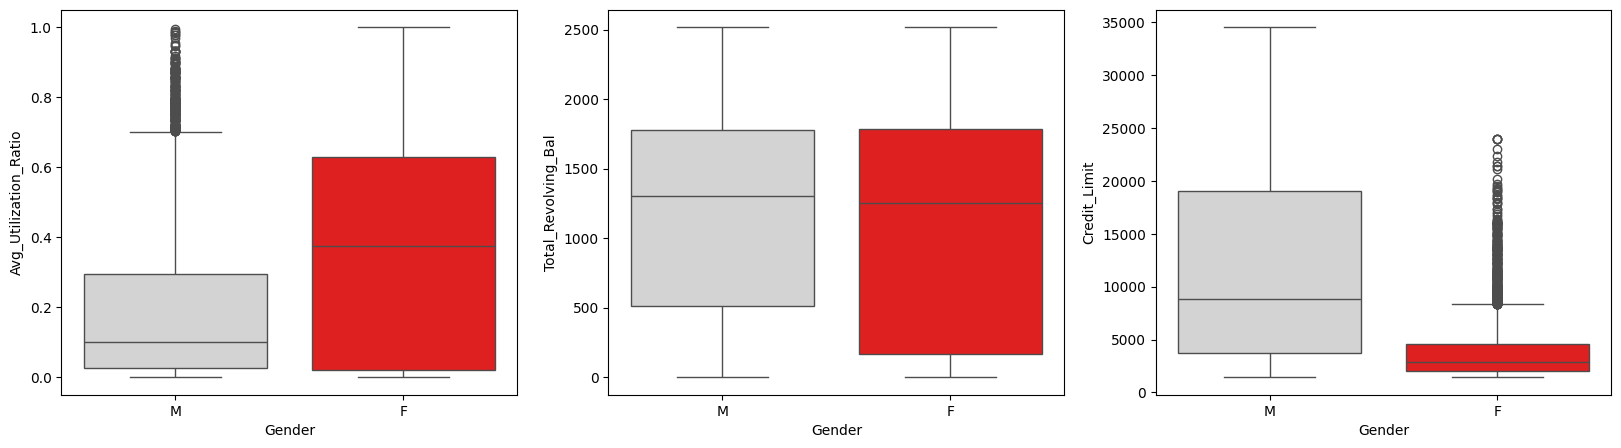

In [29]:
plt.figure(figsize=(20,5))

plt.subplot(131)
sns.boxplot(data=df, x='Gender', y='Avg_Utilization_Ratio', palette=color_r)

plt.subplot(132)
sns.boxplot(data=df, x='Gender', y='Total_Revolving_Bal', palette=color_r)

plt.subplot(133)
sns.boxplot(data=df, x='Gender', y='Credit_Limit', palette=color_r)

Chart 1

Female customers have high potential:
_ 50% of Female have higher AUR than 75% Male
=> Women use credit card more than men

Chart 2 & 3

Bank can make more money from interest from women compare to men
_ Women have lower credit limits but similar total revolving balances (Tổng dư nợ xoay vòng) compared to men.
=> This indicates that women often only make minimum monthly payments
=> Resulting in higher interest charges over time

Example:

_ John has a credit limit of 10 million VND.
_ Mary has a credit limit of 5 million VND.
=> Both of them have maxed out their credit cards (10 mils & 5 mils)

_ John can afford to pay 5 million VND each month
_ While Mary can only pay 1 million VND (the minimum payment).

=> Bank can get more interest (over time) from Mary
(John is quicker to pay off the debt)

## 4.3/. Number of products

In [30]:
product = df.groupby(['Gender', 'Total_Relationship_Count'])[['Avg_Utilization_Ratio', 'Total_Revolving_Bal', 'Credit_Limit']].mean().reset_index()

In [31]:
product

,Gender,Total_Relationship_Count,Avg_Utilization_Ratio,Total_Revolving_Bal,Credit_Limit
0,F,1,0.339565,1170.037037,4529.138580
1,F,2,0.330663,1131.049881,4610.617340
2,F,3,0.361550,1112.237745,3808.551716
3,F,4,0.401839,1179.745714,3564.370571
4,F,5,0.392584,1176.037088,3875.663049
5,F,6,0.371411,1150.472527,3994.667347
6,M,1,0.152805,1195.394521,15808.597534
7,M,2,0.166249,1138.500000,14598.104150
8,M,3,0.193215,1172.823982,12337.162046
9,M,4,0.202326,1161.978780,12307.143501


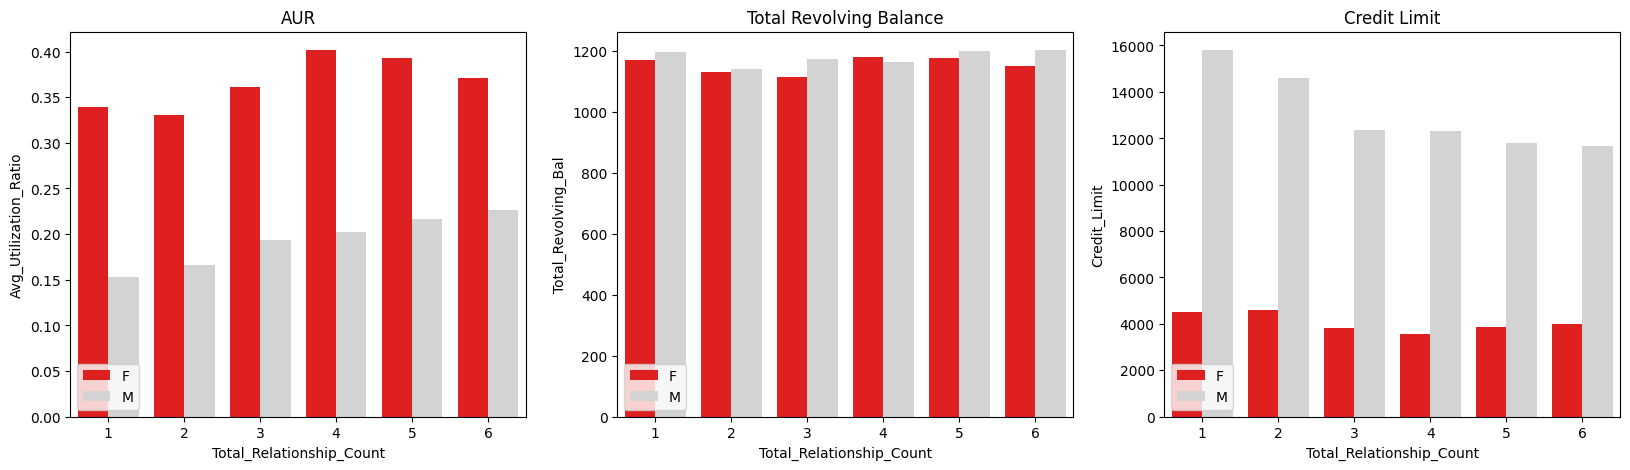

In [32]:
color = ['red', 'lightgray']

plt.figure(figsize=(20,5))

plt.subplot(131)
sns.barplot(data=product, x='Total_Relationship_Count', y='Avg_Utilization_Ratio', hue='Gender', palette=color)
plt.legend(loc='lower left')
plt.title('AUR')

plt.subplot(132)
sns.barplot(data=product, x='Total_Relationship_Count', y='Total_Revolving_Bal', hue='Gender', palette=color)
plt.legend(loc='lower left')
plt.title('Total Revolving Balance')

plt.subplot(133)
sns.barplot(data=product, x='Total_Relationship_Count', y='Credit_Limit', hue='Gender', palette=color)
plt.legend(loc='lower left')
plt.title('Credit Limit')

plt.show()

In any number of cards one customer owns, female customers have much higher AUR than Male counterparts and they tend to utilize these cards for their daily payment.

## 4.4/. Payment Amount

In [33]:
df['Amt_Ct_Percent'] = df['Total_Trans_Amt'] / df['Total_Trans_Ct']

C:\Users\Admin\AppData\Local\Temp\ipykernel_13536\1453449086.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Total_Trans_Amt', palette=color_r)


C:\Users\Admin\AppData\Local\Temp\ipykernel_13536\1453449086.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Total_Trans_Ct', palette=color_r)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13536\1453449086.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Amt_Ct_Percent', palette=color_r)


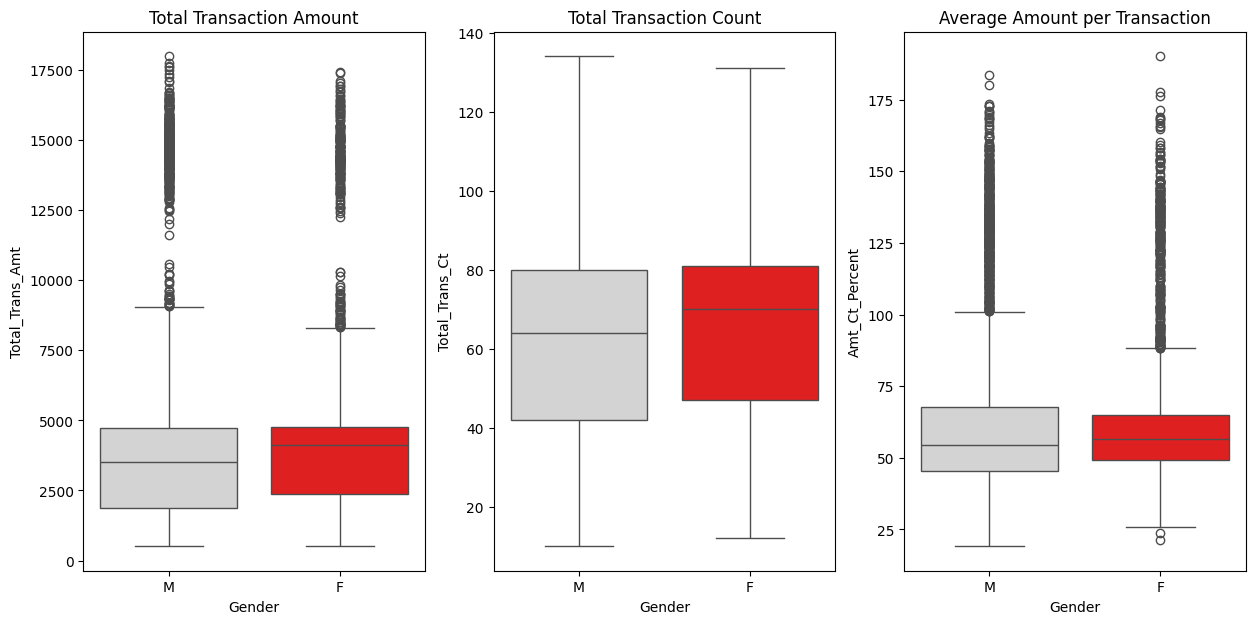

In [34]:
plt.figure(figsize=(15,7))

plt.subplot(131)
sns.boxplot(data=df, x='Gender', y='Total_Trans_Amt', palette=color_r)
plt.title('Total Transaction Amount')

plt.subplot(132)
sns.boxplot(data=df, x='Gender', y='Total_Trans_Ct', palette=color_r)
plt.title('Total Transaction Count')

plt.subplot(133)
sns.boxplot(data=df, x='Gender', y='Amt_Ct_Percent', palette=color_r)
plt.title('Average Amount per Transaction')

plt.show()

_ Female customers have much higher transaction amount during the year. 
_ Also, number of transaction, and the average amount per transaction (during the year) of female are also higher than male.

# 5/. Colusion

Conclusion:

_ Average utilization rate (AUR): Throughout the year, female customers is higher than male
=> Indicate a higher propensity to utilize their credit limits

_ Women tended to hold multiple credit cards, and were more accepting of monthly interest charges. 

_ Female customers also have higher overall transaction volumes and average transaction values.

Implications:

_ Female customers are a significant customer segment, contributing substantially to the bank's revenue through credit utilization and interest payments. 
_ Women exhibit higher spending tendencies and more active credit card usage compared to men. 
=> This presents a significant growth opportunity for banks to develop products and services tailored to women's specific needs.

In summary:

_ This analyst indicate that women represent a valuable customer segment with substantial growth potential for banks. 
=> A deep understanding of women's consumer behavior is 
essential for banks to develop effective business strategies.

# Export Data to Excel

In [35]:
""" 

import openpyxl

# Giả sử ta có các DataFrame: df, product

def export_data_to_excel(file_path, sheet_name, data):
  writer = pd.ExcelWriter(file_path, engine='openpyxl')
  data.to_excel(writer, sheet_name=sheet_name, index=False)
  writer.close()

# Export:
export_data_to_excel('credit_card_data.xlsx', 'all_data', df)
export_data_to_excel('product.xlsx', 'all_data', product)

"""

" \n\nimport openpyxl\n\n# Giả sử ta có các DataFrame: df, product\n\ndef export_data_to_excel(file_path, sheet_name, data):\n  writer = pd.ExcelWriter(file_path, engine='openpyxl')\n  data.to_excel(writer, sheet_name=sheet_name, index=False)\n  writer.close()\n\n# Export:\nexport_data_to_excel('credit_card_data.xlsx', 'all_data', df)\nexport_data_to_excel('product.xlsx', 'all_data', product)\n\n"